# Task - 3: Sales Prediction Using Machine Learning

# Importing the Necessary Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Loading the Advertising Dataset:

In [4]:
# Example: Advertising dataset (TV, Radio, Newspaper vs Sales)
data = pd.read_csv("Advertising.csv")  

print("First 5 rows of dataset:")
print(data.head())

First 5 rows of dataset:
      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


# Exploratory Data Analysis:

In [6]:
print("\nDataset Info:")
print(data.info())

print("\nChecking for null values:")
print(data.isnull().sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None

Checking for null values:
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


# Describing the Dataset:

In [16]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


# Shape of the Dataset:

In [17]:
data.shape

(200, 4)

# Size of the Dataset:

In [18]:
data.size

800

# List of All Column Names:

In [19]:
data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

# Correlation Heatmap:

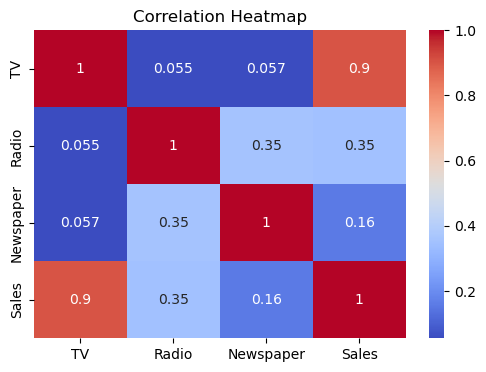

In [7]:
plt.figure(figsize=(6,4))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Pairpolt to see Relationships:

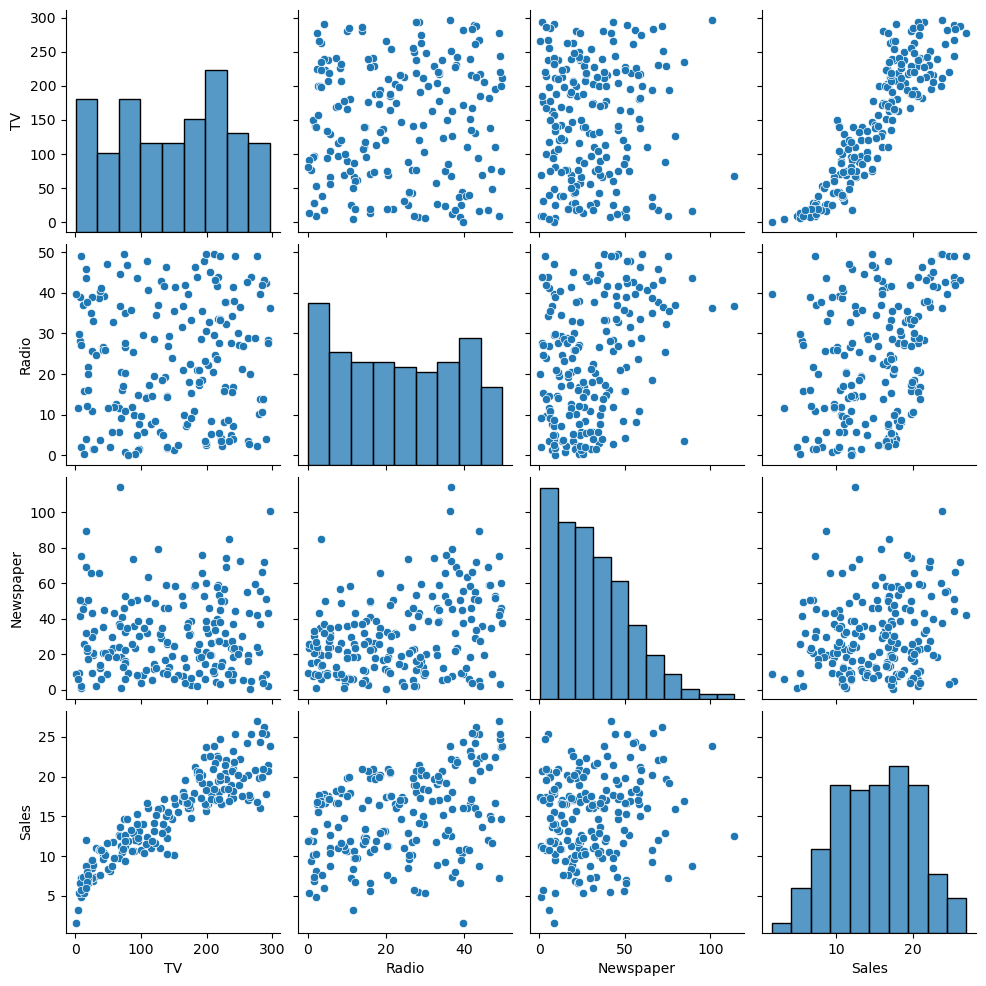

In [23]:
sns.pairplot(data)
plt.show()

# Define Features (X) and Target (y):

In [8]:
X = data[["TV", "Radio", "Newspaper"]]   # independent variables
y = data["Sales"]                        # dependent variable

# Splitting Dataset:

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training:

In [10]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Make Predictions:

In [11]:
y_pred = model.predict(X_test)

# Evaluate Model Performance:

In [12]:
print("\nModel Evaluation:")
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))


Model Evaluation:
Mean Squared Error (MSE): 2.907756910271091
Root Mean Squared Error (RMSE): 1.7052146229349228
R² Score: 0.9059011844150826


# Compare Actual vs Predicted:

In [13]:
results = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
print("\nSample Prediction Results:")
print(results.head())


Sample Prediction Results:
     Actual  Predicted
95     16.9  17.034772
15     22.4  20.409740
30     21.4  23.723989
158     7.3   9.272785
128    24.7  21.682719


# Scatter plot for Actual vs Predicted:

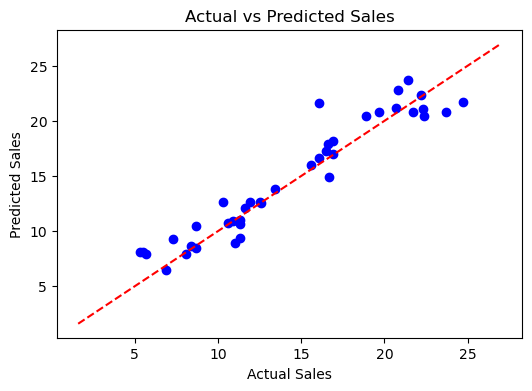

In [14]:
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred, color="blue")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # line of equality
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()

# Predict for New Data:

In [15]:
new_data = pd.DataFrame({
    "TV": [150, 230],
    "Radio": [20, 45],
    "Newspaper": [15, 30]
})

predicted_sales = model.predict(new_data)
print("\nPredicted Sales for new ad spend data:")
print(predicted_sales)


Predicted Sales for new ad spend data:
[14.97447398 21.92389941]


# Check Model Coefficients:

In [21]:
print("\nModel Coefficients:")
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})
print(coefficients)

print("\nIntercept:", model.intercept_)


Model Coefficients:
     Feature  Coefficient
0         TV     0.054509
1      Radio     0.100945
2  Newspaper     0.004337

Intercept: 4.714126402214134
